## Laptop Price Prediction
### >The dataset emulates laptop prices, capturing various features commonly associated with laptops and their corresponding simulated prices. The dataset encompasses key attributes such as brand, processor speed, RAM size, storage capacity, screen size, and weight
### Let's build a model that is able to predict price a new laptop

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Laptop_price.csv')
df.head()

,Brand,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
0,Asus,3.830296,16,512,11.185147,2.641094,17395.093065
1,Acer,2.912833,4,1000,11.311372,3.260012,31607.605919
2,Lenovo,3.241627,4,256,11.853023,2.029061,9291.023542
3,Acer,3.806248,16,512,12.280360,4.573865,17436.728334
4,Acer,3.268097,32,1000,14.990877,4.193472,32917.990718


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.describe()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2.750611,15.500000,584.576000,14.056790,3.466919,19604.187963
std,0.731796,10.988665,313.438517,1.705882,0.866541,9406.064880
min,1.511580,4.000000,256.000000,11.012111,2.000560,8570.012950
25%,2.089246,8.000000,256.000000,12.635523,2.717211,10114.012948
50%,2.760885,16.000000,512.000000,14.099643,3.464630,17287.241878
75%,3.362610,32.000000,1000.000000,15.528590,4.212583,31566.214754
max,3.998534,32.000000,1000.000000,16.985737,4.990728,33503.935037


### Brand:Represents the laptop brand, with options including Dell, HP, Lenovo, Asus, and Acer
### Processor_Speed:Indicates the speed of the laptop's processor, generated uniformly between 1.5 and 4.0 GHz
### RAM_Size:Represents the random selection of RAM sizes, including 4GB, 8GB, 16GB, and 32GB
### Storage_Capacity:Simulates different storage capacities with options of 256GB, 512GB, and 1000GB (1TB).
### Screen_Size:Represents the size of the laptop screen, randomly generated between 11 and 17 inches.
### Weight:Indicates the weight of the laptop in kilograms, simulated uniformly between 2.0 and 5.0 kg.
### Price(russian):Simulates the laptop prices based on a linear relationship with the features, including some added noise to mimic

In [7]:
df.columns = df.columns.str.lower()
df.columns

Index(['brand', 'processor_speed', 'ram_size', 'storage_capacity',
       'screen_size', 'weight', 'price'],
      dtype='object')

In [8]:
df.brand.value_counts()

Dell      210
Asus      206
Acer      204
Lenovo    190
HP        190
Name: brand, dtype: int64

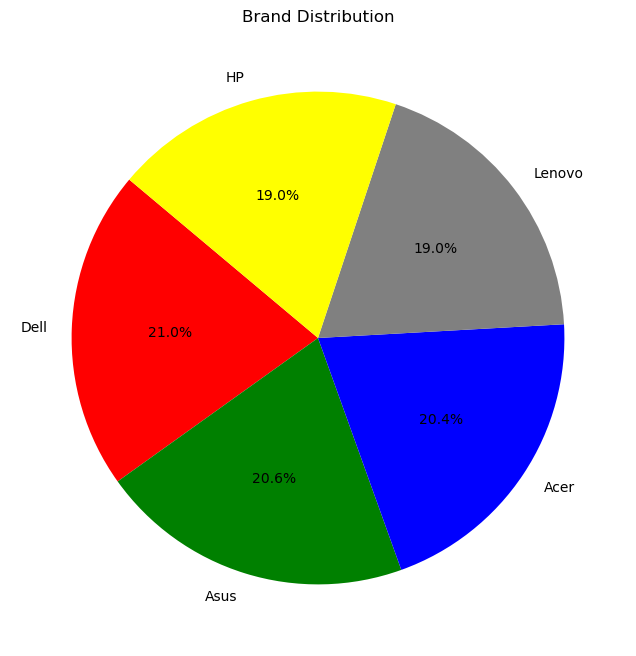

In [11]:
categories = df.brand.value_counts().index
values = df.brand.value_counts().values

# Create the pie chart
plt.figure(figsize=(8, 8))  # Set the figure size
plt.pie(values, labels=categories, autopct='%1.1f%%', startangle=140, colors=['red', 'green', 'blue','grey','yellow'])

# Add a title
plt.title('Brand Distribution')

# Show plot
plt.show()


In [12]:
print(f" Max Processor speed is: {df.processor_speed.max()}")
print(f" Min Processor speed is: {df.processor_speed.min()}")

 Max Processor speed is: 3.9985343144266654
 Min Processor speed is: 1.511580057511507


<Axes: xlabel='processor_speed', ylabel='Count'>

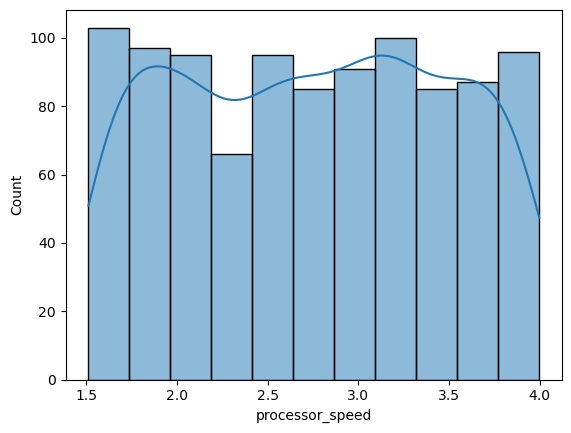

In [13]:
sns.histplot(x=df.processor_speed,kde=True)

<Axes: xlabel='processor_speed'>

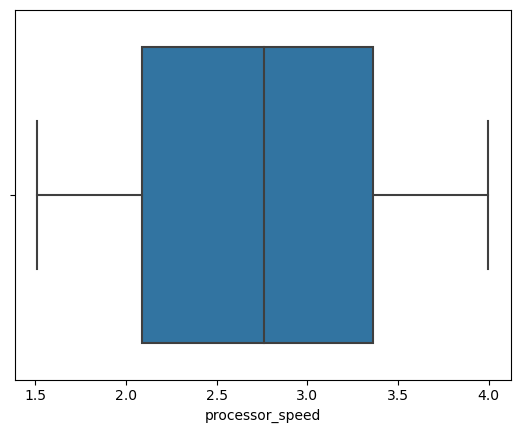

In [15]:
sns.boxplot(x=df.processor_speed)

In [16]:
df.ram_size.value_counts()

32    274
8     246
4     243
16    237
Name: ram_size, dtype: int64

<Axes: xlabel='ram_size', ylabel='count'>

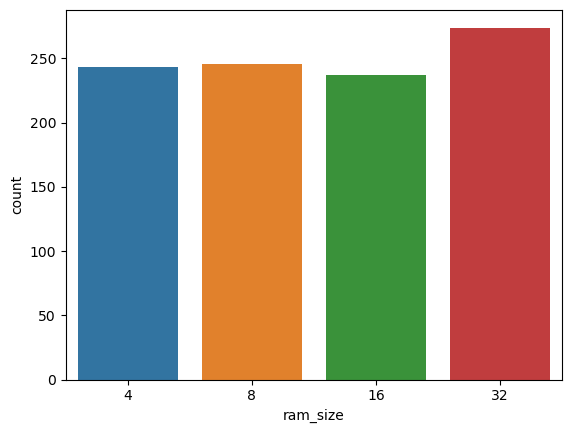

In [18]:
sns.countplot(x=df.ram_size)

In [19]:
df.storage_capacity.value_counts()

256     357
1000    336
512     307
Name: storage_capacity, dtype: int64

<Axes: xlabel='storage_capacity', ylabel='count'>

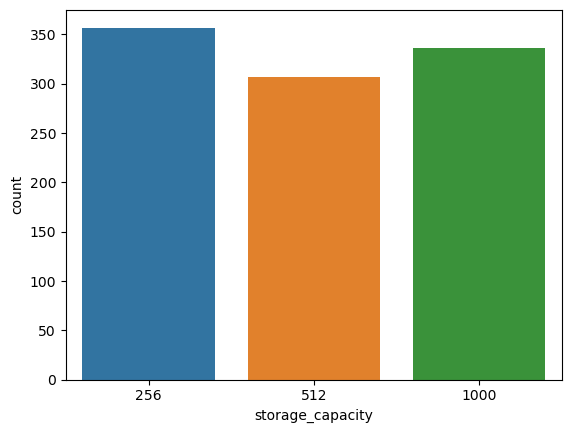

In [20]:
sns.countplot(x=df.storage_capacity)

<Axes: xlabel='screen_size', ylabel='Count'>

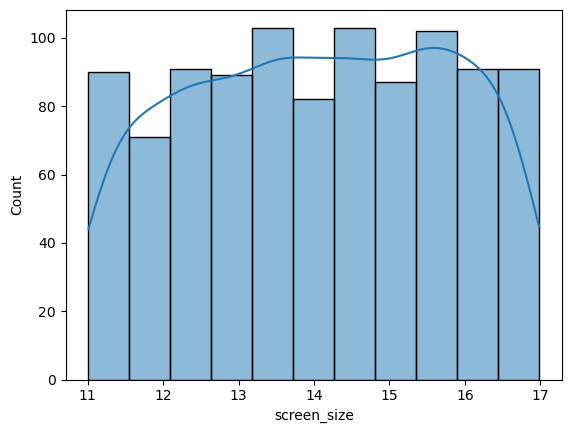

In [22]:
sns.histplot(x=df.screen_size,kde=True)

<Axes: xlabel='weight', ylabel='Count'>

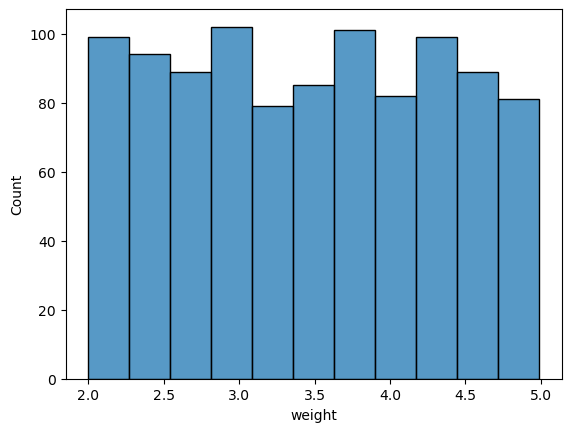

In [23]:
sns.histplot(x=df.weight)

<Axes: xlabel='price', ylabel='Count'>

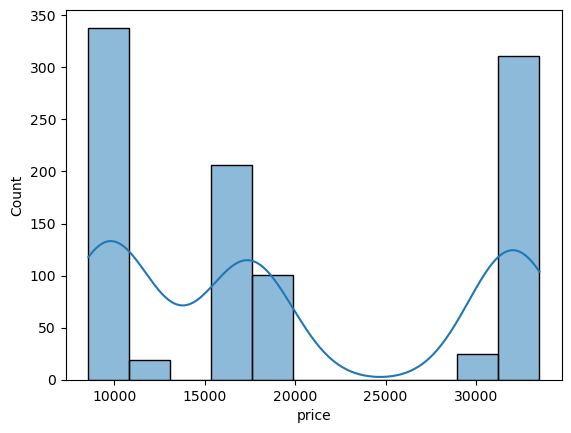

In [25]:
sns.histplot(x=df.price,kde=True)

<Axes: xlabel='price'>

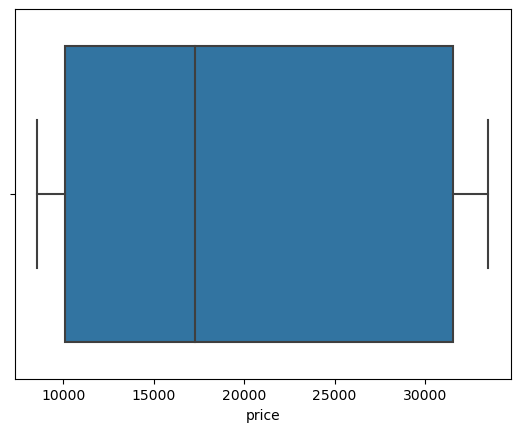

In [26]:
sns.boxplot(x=df.price)

### Convert price to USD

In [27]:
df.price = df.price.apply(lambda x: x/88.5)

In [28]:
df.head()

,brand,processor_speed,ram_size,storage_capacity,screen_size,weight,price
0,Asus,3.830296,16,512,11.185147,2.641094,196.554724
1,Acer,2.912833,4,1000,11.311372,3.260012,357.148089
2,Lenovo,3.241627,4,256,11.853023,2.029061,104.983317
3,Acer,3.806248,16,512,12.280360,4.573865,197.025179
4,Acer,3.268097,32,1000,14.990877,4.193472,371.954697


In [29]:
df.shape

(1000, 7)

In [30]:
cols = ['processor_speed', 'ram_size', 'storage_capacity',
       'screen_size', 'weight', 'price']
for col in cols:
    df[col] = np.round(df[col],3)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.head()

,brand,processor_speed,ram_size,storage_capacity,screen_size,weight,price
0,Dell,3.329,32,256,16.290,2.731,123.170
1,Asus,2.182,8,1000,12.993,2.100,358.503
2,HP,1.953,16,256,14.823,2.189,108.882
3,Acer,3.224,4,256,13.026,4.779,106.357
4,HP,2.615,16,1000,12.671,4.227,357.527


In [31]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score

### Building pipeline

In [35]:
encoder = OneHotEncoder()
scaler = StandardScaler(with_mean=False)
enc_cols = ['brand']
sc_cols = ['processor_speed', 'ram_size', 'storage_capacity','screen_size', 'weight']

enc_pipeline = Pipeline(steps=[
    ('encoder',OneHotEncoder()),
    ('scaler',StandardScaler(with_mean=False))
])

sc_pipeline = Pipeline(steps=[
    ('scaler',StandardScaler(with_mean=False))
])

preprocessor = ColumnTransformer([
    ('enc_pipeline',enc_pipeline,enc_cols),
    ('sc_pipeline',sc_pipeline,sc_cols)
])

### Creating dependent and independent variables then fitting the preprocessor pipeline on the train set

In [33]:
X = df.drop('price',axis=1)
y = df.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [36]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

### Building various models

In [37]:
models = {
    'Linear Regression':LinearRegression(),
    'KNeighbours':KNeighborsRegressor(),
    'Cat Boost':CatBoostRegressor(),
    'XGB':XGBRegressor(),
    'Decision Tree':DecisionTreeRegressor(),
    'Random Forest':RandomForestRegressor(),  
}

In [39]:
report = {}
print('Modes Outcomes')
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    score = r2_score(y_test,prediction)
    report[list(models.keys())[i]] = score
best_score = max(sorted(list(report.values())))
for k,v in report.items():
    if v == best_score:
        best_model_name = k
        break
print(report)
print(f"{best_model_name} is the best model with accuracy of {best_score}")

Modes Outcomes
Learning rate set to 0.039124
0:	learn: 102.3019614	total: 6.78ms	remaining: 6.78s
1:	learn: 98.4502779	total: 11.3ms	remaining: 5.65s
2:	learn: 94.7999761	total: 17.9ms	remaining: 5.96s
3:	learn: 91.5853967	total: 23.5ms	remaining: 5.84s
4:	learn: 88.1023613	total: 26.9ms	remaining: 5.34s
5:	learn: 84.8776477	total: 32.5ms	remaining: 5.39s
6:	learn: 81.8134436	total: 38.3ms	remaining: 5.43s
7:	learn: 78.8268507	total: 42.2ms	remaining: 5.23s
8:	learn: 76.1801872	total: 45.8ms	remaining: 5.04s
9:	learn: 73.2542157	total: 47.3ms	remaining: 4.69s
10:	learn: 70.7468124	total: 50.9ms	remaining: 4.58s
11:	learn: 68.0321898	total: 52.4ms	remaining: 4.32s
12:	learn: 65.6040668	total: 55.9ms	remaining: 4.24s
13:	learn: 63.1826953	total: 59.2ms	remaining: 4.17s
14:	learn: 60.7903387	total: 61.2ms	remaining: 4.02s
15:	learn: 58.5691282	total: 64.6ms	remaining: 3.98s
16:	learn: 56.5777697	total: 65.8ms	remaining: 3.8s
17:	learn: 54.4846427	total: 68.6ms	remaining: 3.74s
18:	learn: 

236:	learn: 1.9751836	total: 430ms	remaining: 1.38s
237:	learn: 1.9727445	total: 432ms	remaining: 1.38s
238:	learn: 1.9711966	total: 435ms	remaining: 1.38s
239:	learn: 1.9696181	total: 436ms	remaining: 1.38s
240:	learn: 1.9676080	total: 438ms	remaining: 1.38s
241:	learn: 1.9649191	total: 440ms	remaining: 1.38s
242:	learn: 1.9622315	total: 441ms	remaining: 1.38s
243:	learn: 1.9590067	total: 444ms	remaining: 1.37s
244:	learn: 1.9572537	total: 445ms	remaining: 1.37s
245:	learn: 1.9548620	total: 447ms	remaining: 1.37s
246:	learn: 1.9515419	total: 449ms	remaining: 1.37s
247:	learn: 1.9477641	total: 451ms	remaining: 1.37s
248:	learn: 1.9456735	total: 454ms	remaining: 1.37s
249:	learn: 1.9416144	total: 456ms	remaining: 1.37s
250:	learn: 1.9401797	total: 459ms	remaining: 1.37s
251:	learn: 1.9386196	total: 461ms	remaining: 1.37s
252:	learn: 1.9368456	total: 463ms	remaining: 1.37s
253:	learn: 1.9345038	total: 465ms	remaining: 1.37s
254:	learn: 1.9318374	total: 467ms	remaining: 1.36s
255:	learn: 

444:	learn: 1.5891263	total: 808ms	remaining: 1.01s
445:	learn: 1.5878337	total: 812ms	remaining: 1.01s
446:	learn: 1.5849572	total: 815ms	remaining: 1.01s
447:	learn: 1.5832178	total: 818ms	remaining: 1.01s
448:	learn: 1.5827455	total: 821ms	remaining: 1.01s
449:	learn: 1.5805331	total: 824ms	remaining: 1.01s
450:	learn: 1.5799414	total: 827ms	remaining: 1.01s
451:	learn: 1.5779915	total: 830ms	remaining: 1s
452:	learn: 1.5757432	total: 832ms	remaining: 1s
453:	learn: 1.5748160	total: 836ms	remaining: 1s
454:	learn: 1.5741996	total: 839ms	remaining: 1s
455:	learn: 1.5734938	total: 843ms	remaining: 1.01s
456:	learn: 1.5715472	total: 846ms	remaining: 1s
457:	learn: 1.5699376	total: 849ms	remaining: 1s
458:	learn: 1.5698169	total: 852ms	remaining: 1s
459:	learn: 1.5693573	total: 856ms	remaining: 1s
460:	learn: 1.5684431	total: 858ms	remaining: 1s
461:	learn: 1.5671960	total: 861ms	remaining: 1s
462:	learn: 1.5664059	total: 863ms	remaining: 1s
463:	learn: 1.5662250	total: 865ms	remaining:

610:	learn: 1.3928307	total: 1.18s	remaining: 753ms
611:	learn: 1.3916886	total: 1.19s	remaining: 753ms
612:	learn: 1.3908235	total: 1.19s	remaining: 751ms
613:	learn: 1.3894409	total: 1.19s	remaining: 749ms
614:	learn: 1.3887055	total: 1.19s	remaining: 747ms
615:	learn: 1.3865345	total: 1.2s	remaining: 746ms
616:	learn: 1.3863101	total: 1.2s	remaining: 744ms
617:	learn: 1.3854986	total: 1.2s	remaining: 742ms
618:	learn: 1.3836031	total: 1.2s	remaining: 740ms
619:	learn: 1.3825337	total: 1.2s	remaining: 738ms
620:	learn: 1.3807720	total: 1.21s	remaining: 736ms
621:	learn: 1.3796620	total: 1.21s	remaining: 734ms
622:	learn: 1.3792599	total: 1.21s	remaining: 733ms
623:	learn: 1.3773085	total: 1.21s	remaining: 732ms
624:	learn: 1.3760767	total: 1.22s	remaining: 730ms
625:	learn: 1.3753303	total: 1.22s	remaining: 728ms
626:	learn: 1.3750308	total: 1.22s	remaining: 726ms
627:	learn: 1.3738448	total: 1.22s	remaining: 724ms
628:	learn: 1.3718697	total: 1.22s	remaining: 722ms
629:	learn: 1.371

805:	learn: 1.2004855	total: 1.55s	remaining: 373ms
806:	learn: 1.1998360	total: 1.55s	remaining: 371ms
807:	learn: 1.1986138	total: 1.55s	remaining: 369ms
808:	learn: 1.1972893	total: 1.55s	remaining: 367ms
809:	learn: 1.1960343	total: 1.56s	remaining: 365ms
810:	learn: 1.1948439	total: 1.56s	remaining: 363ms
811:	learn: 1.1940683	total: 1.56s	remaining: 361ms
812:	learn: 1.1939879	total: 1.56s	remaining: 359ms
813:	learn: 1.1937195	total: 1.56s	remaining: 358ms
814:	learn: 1.1936043	total: 1.57s	remaining: 356ms
815:	learn: 1.1931177	total: 1.57s	remaining: 354ms
816:	learn: 1.1924044	total: 1.57s	remaining: 352ms
817:	learn: 1.1907036	total: 1.57s	remaining: 350ms
818:	learn: 1.1903857	total: 1.57s	remaining: 348ms
819:	learn: 1.1898558	total: 1.58s	remaining: 346ms
820:	learn: 1.1893558	total: 1.58s	remaining: 345ms
821:	learn: 1.1877840	total: 1.58s	remaining: 343ms
822:	learn: 1.1868725	total: 1.58s	remaining: 341ms
823:	learn: 1.1861309	total: 1.58s	remaining: 339ms
824:	learn: 

{'Linear Regression': 0.9995693870788378, 'KNeighbours': 0.9250328919973383, 'Cat Boost': 0.9994141767074868, 'XGB': 0.9993775903306253, 'Decision Tree': 0.9990493884093612, 'Random Forest': 0.9994290666111787}
Linear Regression is the best model with accuracy of 0.9995693870788378


### Let's save the best model

In [40]:
regressor = models[best_model_name]
import pickle
data = {'model':regressor,'preprocessor':preprocessor}
with open('laptop.pkl','wb') as file:
    pickle.dump(data,file)